# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | altai
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | amahai
Processing Record 5 of Set 1 | kulhudhuffushi
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | arques
Processing Record 10 of Set 1 | baardheere
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | howrah
Processing Record 13 of Set 1 | bulgan
Processing Record 14 of Set 1 | ambarakaraka
City not found. Skipping...
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | pemba
Processing Record 18 of Set 1 | brattleboro
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | berezovyy
Processing Record 21 of Set 1 | faxinal
Processing Record 22 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data = city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,-22.79,99,100,1.45,RU,1734105700
1,altai,46.3722,96.2583,-16.64,40,0,0.34,MN,1734105701
2,bredasdorp,-34.5322,20.0403,18.91,44,62,7.60,ZA,1734105702
3,amahai,-3.3333,128.9167,26.64,84,100,1.73,ID,1734105703
4,kulhudhuffushi,6.6221,73.0700,28.50,75,39,3.29,MV,1734105704


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-22.79,99,100,1.45,RU,1734105700
1,altai,46.3722,96.2583,-16.64,40,0,0.34,MN,1734105701
2,bredasdorp,-34.5322,20.0403,18.91,44,62,7.60,ZA,1734105702
3,amahai,-3.3333,128.9167,26.64,84,100,1.73,ID,1734105703
4,kulhudhuffushi,6.6221,73.0700,28.50,75,39,3.29,MV,1734105704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

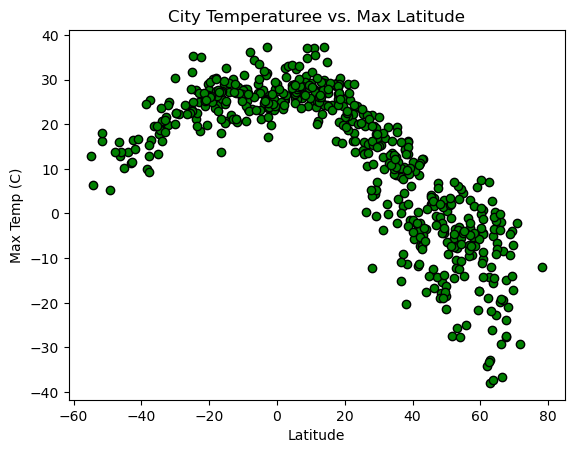

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], 
            color='green', 
            marker='o', 
            edgecolors='black')

# Incorporate the other graph properties
plt.title('City Temperaturee vs. Max Latitude'),
plt.xlabel('Latitude'),
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

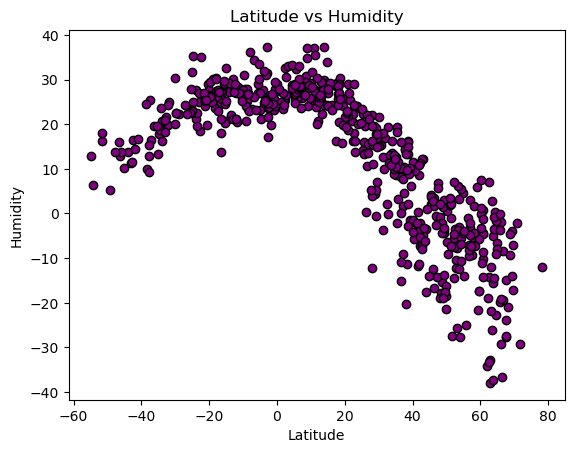

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            color='purple', 
            marker='o',
            edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

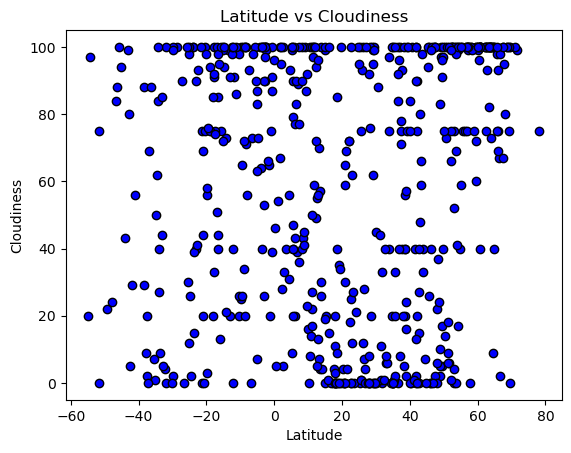

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            color='blue', 
            marker='o',
            edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

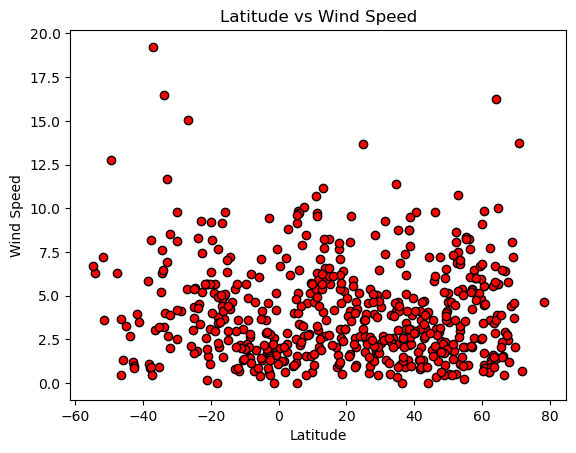

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            color='red', 
            marker='o',
            edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


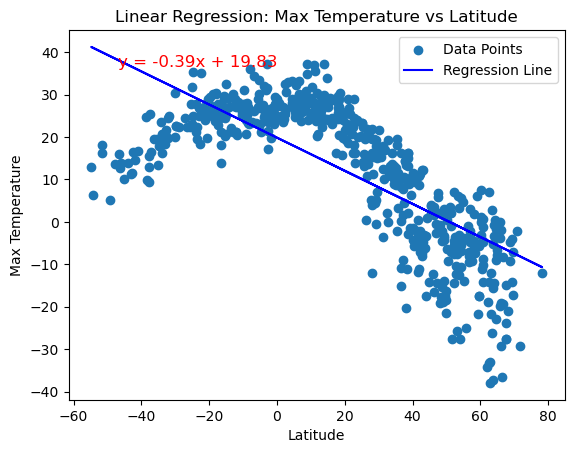

The r^2-value is: -0.7413272879225112


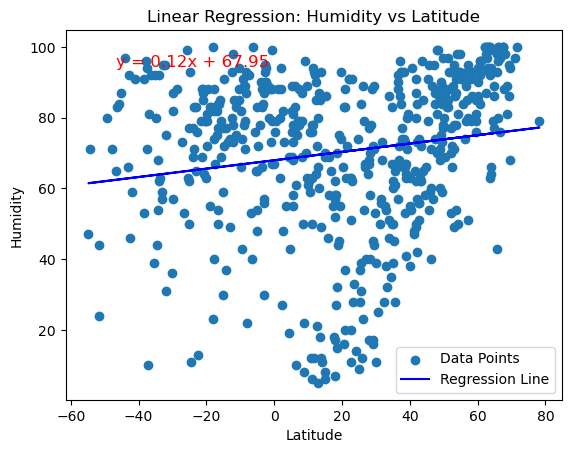

The r^2-value is: 0.16402980968829114


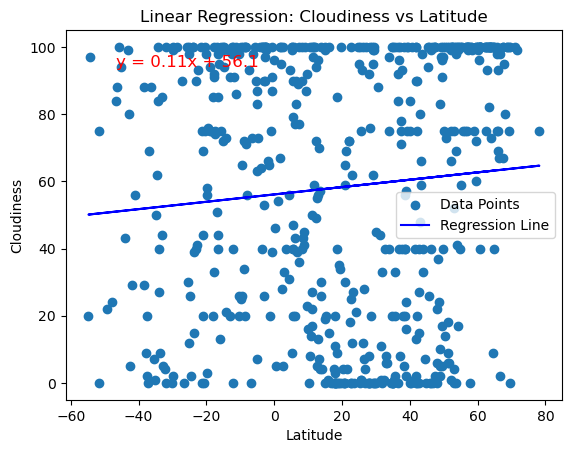

The r^2-value is: 0.08766710928741549


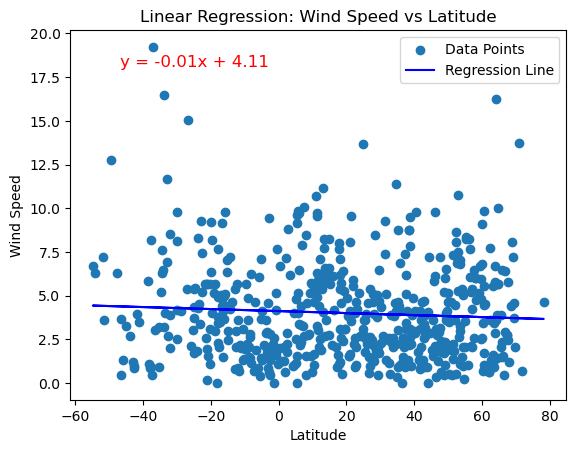

The r^2-value is: -0.06387210029814266


(-0.005756379779857101,
 4.111476586983652,
 -0.06387210029814266,
 0.13113168019334442,
 0.0038074433176458066)

In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        regress_values = slope * x_values + intercept
        plt.scatter(x_values, y_values, label='Data Points')
        plt.plot(x_values, regress_values, color='blue', label='Regression Line')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'Linear Regression: {y_label} vs {x_label}')
        plt.legend()
        plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', 
                xy=(0.1, 0.9), 
                xycoords='axes fraction', 
                fontsize=12, 
                color='red')
        plt.show()
        print(f"The r^2-value is: {r_value}")
        return slope, intercept, r_value, p_value, std_err

# Create regression values'
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
def northern_hemisphere_df(weather_data):
    return weather_data[weather_data['Lat']>=0]
northern_hemi_df = northern_hemisphere_df(city_data_df)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-22.79,99,100,1.45,RU,1734105700
1,altai,46.3722,96.2583,-16.64,40,0,0.34,MN,1734105701
4,kulhudhuffushi,6.6221,73.0700,28.50,75,39,3.29,MV,1734105704
6,lihue,21.9789,-159.3672,20.97,91,72,5.90,US,1734105707
8,arques,50.7337,2.3024,2.73,85,73,1.89,FR,1734105709


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
def southern_hemisphere_df(weather_data):
    return weather_data[weather_data['Lat']>=0]
southern_hemi_df = southern_hemisphere_df(city_data_df)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-22.79,99,100,1.45,RU,1734105700
1,altai,46.3722,96.2583,-16.64,40,0,0.34,MN,1734105701
4,kulhudhuffushi,6.6221,73.0700,28.50,75,39,3.29,MV,1734105704
6,lihue,21.9789,-159.3672,20.97,91,72,5.90,US,1734105707
8,arques,50.7337,2.3024,2.73,85,73,1.89,FR,1734105709


###  Temperature vs. Latitude Linear Regression Plot

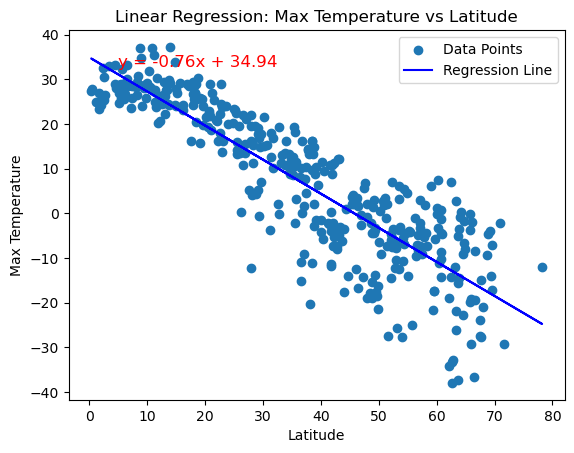

The r^2-value is: -0.8773901252217904


(-0.7630970028901685,
 34.94139315761794,
 -0.8773901252217904,
 8.885608305496528e-127,
 0.021102728716552485)

In [18]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature')

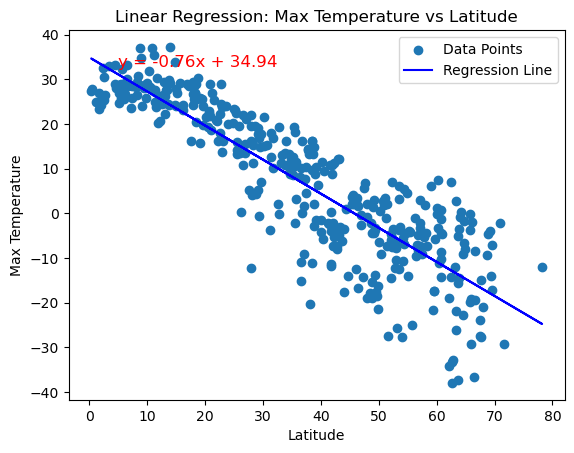

The r^2-value is: -0.8773901252217904


(-0.7630970028901685,
 34.94139315761794,
 -0.8773901252217904,
 8.885608305496528e-127,
 0.021102728716552485)

In [19]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature')

**Discussion about the linear relationship:** he regression line shows that the city latitude is closer to 0 the warmer the temperature is. This is shown in both the Southern and Northern Hemisphere. The r value alkso supports these findings. 

### Humidity vs. Latitude Linear Regression Plot

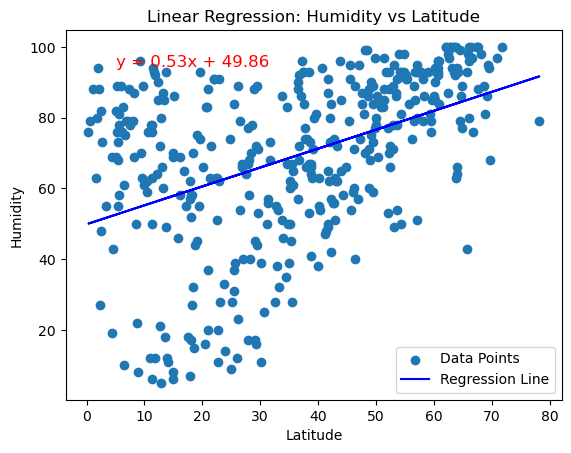

The r^2-value is: 0.4434820164619826


(0.5345381330893728,
 49.86481304409594,
 0.4434820164619826,
 2.2929988999156952e-20,
 0.05463357130060804)

In [20]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

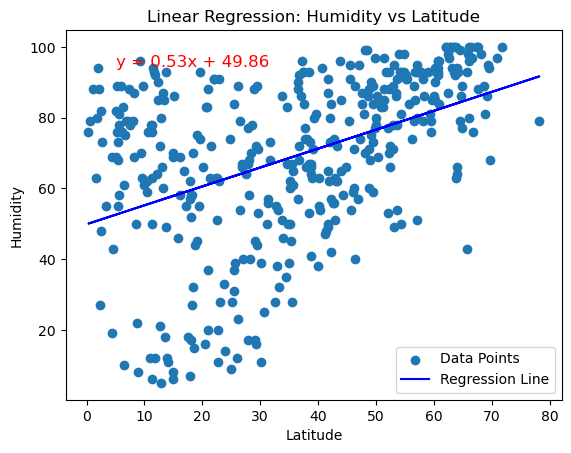

The r^2-value is: 0.4434820164619826


(0.5345381330893728,
 49.86481304409594,
 0.4434820164619826,
 2.2929988999156952e-20,
 0.05463357130060804)

In [21]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** There is not an apparent relationship between Humidity and Latitude, as proven by the r squared value. 

### Cloudiness vs. Latitude Linear Regression Plot

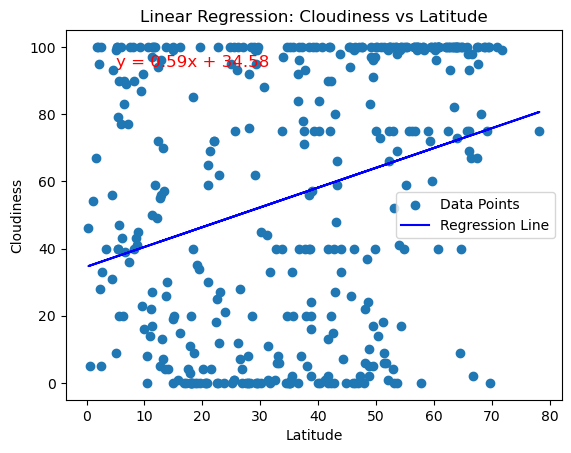

The r^2-value is: 0.2883289124339551


(0.5889136458637071,
 34.5762930186372,
 0.2883289124339551,
 5.8222107945374474e-09,
 0.09890723996590879)

In [22]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')


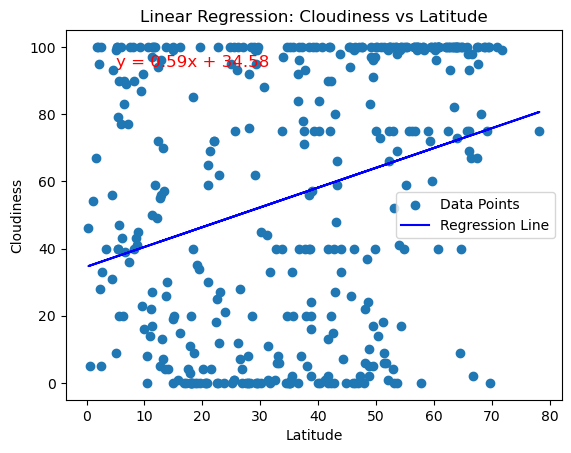

The r^2-value is: 0.2883289124339551


(0.5889136458637071,
 34.5762930186372,
 0.2883289124339551,
 5.8222107945374474e-09,
 0.09890723996590879)

In [23]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The relationship between latitude and cloudiness has no correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

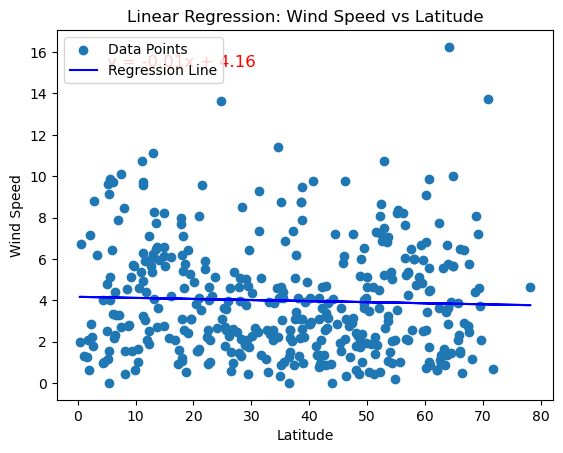

The r^2-value is: -0.03750420026149352


(-0.005154705070742712,
 4.163781909629705,
 -0.03750420026149352,
 0.45846039978105524,
 0.0069459217673808965)

In [24]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')


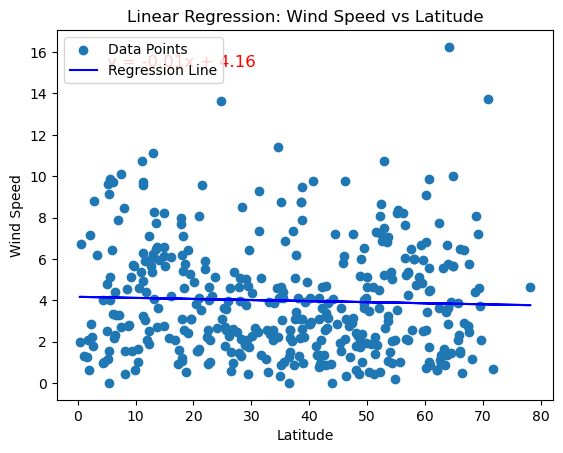

The r^2-value is: -0.03750420026149352


(-0.005154705070742712,
 4.163781909629705,
 -0.03750420026149352,
 0.45846039978105524,
 0.0069459217673808965)

In [25]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')


**Discussion about the linear relationship:** The r squared value shows that a relationship is not strong between wind speed and latitude. An r squared value below .1 indicates a poor relationship. 